In [1]:
import pandas as pd
file_path = 'sample_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,ResponseID,CrossingSignal,NumberOfCharacters,Saved,LeftHand,Man,Woman,Pregnant,Stroller,OldMan,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,FuBqcfGjNSZTGLmJL,2,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,FuBqcfGjNSZTGLmJL,0,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FuBqbkH5834oodYJA,0,5.0,1,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,FuBqbkH5834oodYJA,0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,FuBq4j5Kw9tYatn35,0,2.0,1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['Saved', 'ResponseID', 'CrossingSignal', 'LeftHand'])
y = data['Saved']

#standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

#predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.6099113813743744,
 '              precision    recall  f1-score   support\n\n           0       0.61      0.63      0.62    104934\n           1       0.61      0.59      0.60    105067\n\n    accuracy                           0.61    210001\n   macro avg       0.61      0.61      0.61    210001\nweighted avg       0.61      0.61      0.61    210001\n')

In [3]:
#model equation
intercept = model.intercept_[0]
coefficients = model.coef_[0]
feature_names = X.columns
coefficients_dict = {feature: coef for feature, coef in zip(feature_names, coefficients)}

intercept, coefficients_dict

(-0.00011980961298880347,
 {'NumberOfCharacters': 0.12200854830201076,
  'Man': 0.0449679393148702,
  'Woman': 0.08122838402915801,
  'Pregnant': 0.11848633466630495,
  'Stroller': 0.12360055940410383,
  'OldMan': -0.14069515253851492,
  'OldWoman': -0.10548868262530585,
  'Boy': 0.1686447164168631,
  'Girl': 0.21158913086943062,
  'Homeless': 0.04845537312403934,
  'LargeWoman': 0.01165602405900479,
  'LargeMan': -0.041827647656281455,
  'Criminal': 0.03796677254430952,
  'MaleExecutive': 0.030403802544820745,
  'FemaleExecutive': 0.08662294685667438,
  'FemaleAthlete': 0.10226548636110484,
  'MaleAthlete': 0.06087666061800518,
  'FemaleDoctor': 0.08621033870730765,
  'MaleDoctor': 0.0506915745930437,
  'Dog': -0.1495594885909117,
  'Cat': -0.17057396480812248})

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


if len(data) % 2 != 0:
    data = data.iloc[:-1]
excluded_cols = ['NumberOfCharacters','Saved', 'CrossingSignal', 'LeftHand']
feature_cols = data.select_dtypes(include=[np.number]).columns.drop(excluded_cols)
diffs = []
for i in range(0, len(data), 2):
    diff = data.loc[i + 1, feature_cols] - data.loc[i, feature_cols]
    diff['Saved'] = data.loc[i + 1]['Saved']
    diffs.append(diff)

diff_data = pd.DataFrame(diffs)
    
X = diff_data.drop('Saved', axis=1)
y = diff_data['Saved']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model2 = LogisticRegression()
model2.fit(X_train, y_train)
# L2 Regularization with a stronger regularization strength
model_l2 = LogisticRegression(C=0.1)

# L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')

# Elastic-Net Regularization
model_elasticnet = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')

model_l2.fit(X_train, y_train)
model_l1.fit(X_train, y_train)
model_elasticnet.fit(X_train, y_train)

#initial model
y_pred = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

#l2 reg model
y_pred_l2 = model_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
report_l2 = classification_report(y_test, y_pred_l2)

#l1 reg model
y_pred_l1 = model_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
report_l1 = classification_report(y_test, y_pred_l1)

#elastic net model
y_pred_en = model_elasticnet.predict(X_test)
accuracy_en = accuracy_score(y_test, y_pred_en)
report_en = classification_report(y_test, y_pred_en)

print(accuracy, accuracy_l2, accuracy_l1, accuracy_en)
#print(report)

 



0.6949142857142857 0.6949238095238095 0.6949047619047619 0.6949047619047619


In [7]:
# Model 2 Equation
intercept = model2.intercept_[0]
coefficients = model2.coef_[0]
feature_names = X.columns
coefficients_dict = {feature: coef for feature, coef in zip(feature_names, coefficients)}

intercept, coefficients_dict

(-0.06988208481483886,
 {'Man': 0.4087303042834109,
  'Woman': 0.4758830159145828,
  'Pregnant': 0.1999339569635965,
  'Stroller': 0.21466806747568687,
  'OldMan': 0.18702317108897248,
  'OldWoman': 0.22568081746617974,
  'Boy': 0.4778930995185175,
  'Girl': 0.5213778211443327,
  'Homeless': 0.11943813367978585,
  'LargeWoman': 0.30928654613010953,
  'LargeMan': 0.24482532523950568,
  'Criminal': 0.019583535008729704,
  'MaleExecutive': 0.20188787664446267,
  'FemaleExecutive': 0.24369016406350377,
  'FemaleAthlete': 0.477202259406122,
  'MaleAthlete': 0.42464029781203805,
  'FemaleDoctor': 0.26765870775679174,
  'MaleDoctor': 0.2520823228815901,
  'Dog': 0.12368923498159871,
  'Cat': 0.09243582479996475})

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from itertools import combinations
import numpy as np

if len(data) % 2 != 0:
    data = data.iloc[:-1]

excluded_cols = ['Saved', 'CrossingSignal', 'LeftHand']
feature_cols = data.select_dtypes(include=[np.number]).columns.drop(excluded_cols)

diffs = []
for i in range(0, len(data), 2):
    diff = data.loc[i + 1, feature_cols] - data.loc[i, feature_cols]
    diff['Saved'] = data.loc[i + 1]['Saved']
    diffs.append(diff)

diff_data = pd.DataFrame(diffs)

# Compute interaction terms
interaction_data = pd.DataFrame(index=diff_data.index)
for comb in combinations(feature_cols, 2):
    col_name = 'interaction_' + '_'.join(comb)
    interaction_data[col_name] = diff_data[comb[0]] * diff_data[comb[1]]

# Concatenate the interaction terms
diff_data = pd.concat([diff_data, interaction_data], axis=1)

X = diff_data.drop('Saved', axis=1)
y = diff_data['Saved']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy: ", accuracy_rf)
print("Random Forest Classification Report: \n", report_rf)


/var/folders/wy/h_0zk9hd5hd7ss0r3nrxbxvc0000gn/T/ipykernel_24223/2955267174.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_data[col_name] = diff_data[comb[0]] * diff_data[comb[1]]
/var/folders/wy/h_0zk9hd5hd7ss0r3nrxbxvc0000gn/T/ipykernel_24223/2955267174.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_data[col_name] = diff_data[comb[0]] * diff_data[comb[1]]
/var/folders/wy/h_0zk9hd5hd7ss0r3nrxbxvc0000gn/T/ipykernel_24223/2955267174.py:27: PerformanceWarning: DataFrame is highly fragmented.  Th

Random Forest Accuracy:  0.6793619047619047
Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.70      0.69     54169
           1       0.67      0.65      0.66     50831

    accuracy                           0.68    105000
   macro avg       0.68      0.68      0.68    105000
weighted avg       0.68      0.68      0.68    105000



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

y_pred_best_rf = best_rf.predict(X_test)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
report_best_rf = classification_report(y_test, y_pred_best_rf)

print("Best Random Forest Accuracy: ", accuracy_best_rf)
print("Best Random Forest Classification Report: \n", report_best_rf)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.9min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.9min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.9min
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time= 3.7min
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time= 3.7min
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time= 1.8min
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time= 3.8min
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time= 1.9min
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time= 1.8min
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time= 5.6min
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time= 5.6min
[CV] END max_depth=None, 

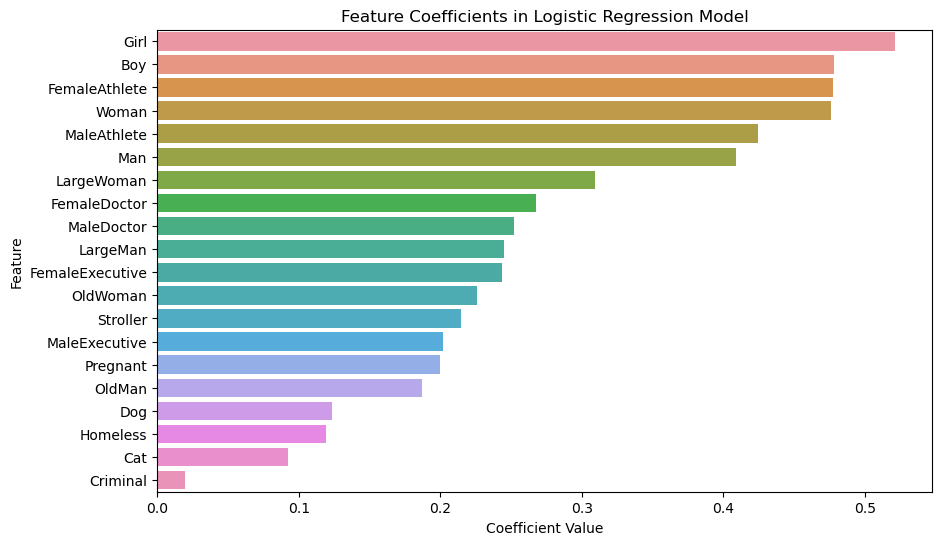

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract coefficients from the model
coefficients = model2.coef_[0]

# Match coefficients with their corresponding feature names
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of the coefficients for better visualization
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title('Feature Coefficients in Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()